# Week 8 - Text Analysis Using NLTK & KoNLPy

Text processing
- Tokenization
- Stemming: 원형 찾기
  - 많이 쓰는 것은 Porter stemmer
  - Lemmatization: Stemming과 좀 다름. 이제는 Stemming한 후 Lemmatization하는 한꺼번에 하는 경우가 많음.
  - 한국어는 어미변화가 심해 불가능하므로 => 형태소 분석기를 사용
- Ordered list of terms


# NLTK를 이용한 영문 분석

* NLTK를 사용하기 위해서는 터미널에서 **```pip install nltk```** 를 수행한다.
* NLTK는 다수의 샘플데이터와 tagger를 위한 모듈이 포함되어 있다.
* 해당 모듈을 다운로드 하기 위해서는 **```nltk.download()```** 를 수행한다.

gutenberg 샘플 데이터 사용할 것

In [2]:
import nltk
# 특정 모듈을 다운로드 하기 위해서는 다음과 같이 해당 모듈의 이름을 패러미터로 제공한다.
nltk.download('gutenberg')  
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package gutenberg to /Users/mac/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

## 1. Reading Sample Data

In [3]:
from nltk.corpus import gutenberg
gutenberg_files = gutenberg.fileids()
gutenberg_files

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
gutenberg_doc = gutenberg.open('austen-emma.txt').read()
gutenberg_doc

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister\'s marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.\n\nSixteen years had Miss Taylor been in Mr. Woodhouse\'s family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.  Between _them_ it was more the intimacy\nof sisters.  Even before Miss Taylor had ceased to hold the nominal\noffice o

## 2. Tokenize the Text

### Example from http://www.nltk.org

In [5]:
nltk.download('punkt')

sentence = """At eight o'clock on Thursday morning
... Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)
tokens

[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 '...',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

In [6]:
nltk.download('averaged_perceptron_tagger')

# 품사 태깅
tagged = nltk.pos_tag(tokens)
tagged

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN'),
 ('...', ':'),
 ('Arthur', 'NNP'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('feel', 'VB'),
 ('very', 'RB'),
 ('good', 'JJ'),
 ('.', '.')]

### Alphabetical list of part-of-speech tags used in the Penn Treebank Project:
https://www.cis.upenn.edu/~treebank/

```
CC Coordinating conjunction
CD Cardinal number
DT Determiner
EX Existential there
FW Foreign word
IN Preposition or subordinating conjunction
JJ Adjective
JJR Adjective, comparative
JJS Adjective, superlative
LS List item marker
MD Modal
NN Noun, singular or mass
NNS Noun, plural
NNP Proper noun, singular
NNPS Proper noun, plural
PDT Predeterminer
POS Possessive ending
PRP Personal pronoun
PRP$ Possessive pronoun
RB Adverb
RBR Adverb, comparative
RBS Adverb, superlative
RP Particle
SYM Symbol
TO to
UH Interjection
VB Verb, base form
VBD Verb, past tense
VBG Verb, gerund or present participle
VBN Verb, past participle
VBP Verb, non­3rd person singular present
VBZ Verb, 3rd person singular present
WDT Wh­determiner
WP Wh­pronoun
WP$ Possessive wh­pronoun
WRB Wh­adverb
```

In [7]:
gutenberg_tokens = nltk.word_tokenize(gutenberg_doc)
gutenberg_tagged = nltk.pos_tag(gutenberg_tokens)

In [8]:
gutenberg_tokens

['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty-one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistin

In [9]:
gutenberg_tagged

[('[', 'NNS'),
 ('Emma', 'NNP'),
 ('by', 'IN'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 (']', 'NNP'),
 ('VOLUME', 'NNP'),
 ('I', 'PRP'),
 ('CHAPTER', 'VBP'),
 ('I', 'PRP'),
 ('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 (',', ','),
 ('handsome', 'NN'),
 (',', ','),
 ('clever', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('rich', 'JJ'),
 (',', ','),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 (',', ','),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('unite', 'VB'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessings', 'NNS'),
 ('of', 'IN'),
 ('existence', 'NN'),
 (';', ':'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('lived', 'VBN'),
 ('nearly', 'RB'),
 ('twenty-one', 'CD'),
 ('years', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('very', 'RB'),
 ('little', 'JJ'),
 ('to', 'TO'),
 ('distress', 'VB'),
 ('or', 'CC'),
 ('vex', 'VB'),
 ('her', 'PRP'),
 ('.', '.')

## 3. Stemming (or lemmatizing) the Words

단어의 어근을 추출하기 위해 stemming 작업을 한다.
* NLTK는 stemming과 lemmatizing을 제공하는데, stemming보다는 lemmatazing이 보다 원하는 결과를 얻을 수 있다.
https://en.wikipedia.org/wiki/Lemmatisation#Description

**Lemmatisation** is closely related to **stemming**. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster, and the reduced accuracy may not matter for some applications.

For instance:

1. The word "better" has "good" as its lemma. This link is missed by stemming, as it requires a dictionary look-up.
2. The word "walk" is the base form for word "walking", and hence this is matched in both stemming and lemmatisation.
3. The word "meeting" can be either the base form of a noun or a form of a verb ("to meet") depending on the context, e.g., "in our last meeting" or "We are meeting again tomorrow". Unlike stemming, lemmatisation can in principle select the appropriate lemma depending on the context.

### Lemmatization

In [10]:
nltk.download('wordnet')

lemma = nltk.wordnet.WordNetLemmatizer()
gutenberg_lemma = []
for token in gutenberg_tokens:
    gutenberg_lemma.append(lemma.lemmatize(token))

gutenberg_lemma

[nltk_data] Downloading package wordnet to /Users/mac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessing',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty-one',
 'year',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'She',
 'wa',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughter',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistinct',

In [11]:
# 기본형 뽑기
gutenberg_lemma_tagged = nltk.pos_tag(gutenberg_lemma)
gutenberg_lemma_tagged

[('[', 'NNS'),
 ('Emma', 'NNP'),
 ('by', 'IN'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 (']', 'NNP'),
 ('VOLUME', 'NNP'),
 ('I', 'PRP'),
 ('CHAPTER', 'VBP'),
 ('I', 'PRP'),
 ('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 (',', ','),
 ('handsome', 'NN'),
 (',', ','),
 ('clever', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('rich', 'JJ'),
 (',', ','),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 (',', ','),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('unite', 'VB'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessing', 'NN'),
 ('of', 'IN'),
 ('existence', 'NN'),
 (';', ':'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('lived', 'VBN'),
 ('nearly', 'RB'),
 ('twenty-one', 'JJ'),
 ('year', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('very', 'RB'),
 ('little', 'JJ'),
 ('to', 'TO'),
 ('distress', 'VB'),
 ('or', 'CC'),
 ('vex', 'VB'),
 ('her', 'PRP'),
 ('.', '.'),
 (

### Stemming

In [12]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
gutenberg_stemmed = []
for token in gutenberg_tokens:
    gutenberg_stemmed.append(porter_stemmer.stem(token))

gutenberg_stemmed

['[',
 'emma',
 'by',
 'jane',
 'austen',
 '1816',
 ']',
 'volum',
 'I',
 'chapter',
 'I',
 'emma',
 'woodhous',
 ',',
 'handsom',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfort',
 'home',
 'and',
 'happi',
 'disposit',
 ',',
 'seem',
 'to',
 'unit',
 'some',
 'of',
 'the',
 'best',
 'bless',
 'of',
 'exist',
 ';',
 'and',
 'had',
 'live',
 'nearli',
 'twenty-on',
 'year',
 'in',
 'the',
 'world',
 'with',
 'veri',
 'littl',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'she',
 'wa',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughter',
 'of',
 'a',
 'most',
 'affection',
 ',',
 'indulg',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequ',
 'of',
 'her',
 'sister',
 "'s",
 'marriag',
 ',',
 'been',
 'mistress',
 'of',
 'hi',
 'hous',
 'from',
 'a',
 'veri',
 'earli',
 'period',
 '.',
 'her',
 'mother',
 'had',
 'die',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistinct',
 'remembr',
 'of',
 'her',
 'caress'

In [13]:
# 어근 뽑기
gutenberg_stemmed_tagged = nltk.pos_tag(gutenberg_stemmed)
gutenberg_stemmed_tagged

[('[', 'NNS'),
 ('emma', 'VBN'),
 ('by', 'IN'),
 ('jane', 'NN'),
 ('austen', 'NN'),
 ('1816', 'CD'),
 (']', 'NNP'),
 ('volum', 'NN'),
 ('I', 'PRP'),
 ('chapter', 'VBP'),
 ('I', 'PRP'),
 ('emma', 'VBP'),
 ('woodhous', 'JJ'),
 (',', ','),
 ('handsom', 'NN'),
 (',', ','),
 ('clever', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('rich', 'JJ'),
 (',', ','),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfort', 'NN'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happi', 'JJ'),
 ('disposit', 'NN'),
 (',', ','),
 ('seem', 'VBP'),
 ('to', 'TO'),
 ('unit', 'NN'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('bless', 'NN'),
 ('of', 'IN'),
 ('exist', 'NN'),
 (';', ':'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('live', 'JJ'),
 ('nearli', 'RB'),
 ('twenty-on', 'JJ'),
 ('year', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('veri', 'JJ'),
 ('littl', 'NN'),
 ('to', 'TO'),
 ('distress', 'VB'),
 ('or', 'CC'),
 ('vex', 'VB'),
 ('her', 'PRP'),
 ('.', '.'),
 ('she', 'PRP'),
 ('wa', 'VBD'

### Compare Stemming and Lemmatization

http://stackoverflow.com/questions/17317418/stemmers-vs-lemmatizers

In [14]:
porter_stemmer.stem('running')

'run'

In [15]:
lemma.lemmatize('running')

'running'

## 실습 1

* 단어별로 카운트를 하여 가장 많이 사용된 순서로 정렬하자.
* (참고) https://docs.python.org/3/library/collections.html#collections.Counter.most_common

In [16]:
from collections import Counter

gutenberg_lemma_counted = Counter(gutenberg_lemma).most_common() # dictionary
gutenberg_lemma_counted

[(',', 12016),
 ('.', 6355),
 ('to', 5125),
 ('the', 4844),
 ('and', 4653),
 ('a', 4388),
 ('of', 4272),
 ('I', 3177),
 ('--', 3100),
 ("''", 2452),
 ('wa', 2383),
 ('her', 2360),
 (';', 2353),
 ('not', 2242),
 ('it', 2221),
 ('in', 2103),
 ('be', 1965),
 ('she', 1774),
 ('``', 1735),
 ('that', 1729),
 ('you', 1664),
 ('had', 1605),
 ('he', 1365),
 ('for', 1320),
 ('have', 1301),
 ('is', 1221),
 ('with', 1185),
 ('very', 1151),
 ('but', 1148),
 ('Mr.', 1091),
 ('his', 1084),
 ('!', 1063),
 ('at', 996),
 ('so', 918),
 ("'s", 866),
 ('Emma', 855),
 ('all', 831),
 ('could', 824),
 ('would', 813),
 ('been', 755),
 ('him', 748),
 ('on', 674),
 ('Mrs.', 668),
 ('any', 651),
 ('?', 621),
 ('my', 619),
 ('no', 616),
 ('Miss', 592),
 ('were', 590),
 ('do', 583),
 ('must', 563),
 ('She', 562),
 ('by', 556),
 ('me', 554),
 ('which', 552),
 ('will', 545),
 ('from', 535),
 ('Harriet', 496),
 ('or', 490),
 ('said', 483),
 ('much', 476),
 ('more', 463),
 ('thing', 454),
 ('an', 451),
 ('are', 447),
 

## 4. Removing Stopwords

In [17]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [18]:
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}'])

# stop_words에 없는 경우에만 filtered_words 리스트에 추가해라
filtered_words = [word for word in gutenberg_lemma if word not in stop_words]
filtered_words # i와 I는 다르게 처리된다. 맨 앞에서 .lower() 를 사용하여 모두 소문자로 변환시키면 문제를 해결할 수 있다.

['Emma',
 'Jane',
 'Austen',
 '1816',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 'handsome',
 'clever',
 'rich',
 'comfortable',
 'home',
 'happy',
 'disposition',
 'seemed',
 'unite',
 'best',
 'blessing',
 'existence',
 'lived',
 'nearly',
 'twenty-one',
 'year',
 'world',
 'little',
 'distress',
 'vex',
 'She',
 'wa',
 'youngest',
 'two',
 'daughter',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 "'s",
 'marriage',
 'mistress',
 'house',
 'early',
 'period',
 'Her',
 'mother',
 'died',
 'long',
 'ago',
 'indistinct',
 'remembrance',
 'caress',
 'place',
 'supplied',
 'excellent',
 'woman',
 'governess',
 'fallen',
 'little',
 'short',
 'mother',
 'affection',
 'Sixteen',
 'year',
 'Miss',
 'Taylor',
 'Mr.',
 'Woodhouse',
 "'s",
 'family',
 'le',
 'governess',
 'friend',
 'fond',
 'daughter',
 'particularly',
 'Emma',
 'Between',
 '_them_',
 'wa',
 'intimacy',
 'sister',
 'Even',
 'Miss',
 'Taylor',
 'ceased',
 'hold',
 'nominal',
 'office',
 '

## 실습 2
* 명사의 유니크리스트를 만들어 보자.
```
NN Noun, singular or mass
NNS Noun, plural
NNP Proper noun, singular
NNPS Proper noun, plural
```

In [25]:
filtered_words_tagged = nltk.pos_tag(filtered_words)

# nouns = dict((k, v) for k, v in filtered_words_tagged if "NN" in v or "NNS" in v)
# nouns

gutenberg_lemma_nouns = set()
for word, tag in filtered_words_tagged:
    if tag in ["NN", "NNS", "NNP", "NNPS"]:
        gutenberg_lemma_nouns.add(word)
        
gutenberg_lemma_nouns

{'admit',
 'behaving',
 'subject',
 'Marriage',
 'win',
 'Alderneys',
 'charade.',
 'purse',
 'cabbage-beds',
 '_that_',
 'pretty',
 'Impropriety',
 'upon',
 'plant',
 'parting',
 'grease',
 'remonstrance',
 'haunt',
 'Poverty',
 'drudge',
 'muffin',
 'cheerless',
 'Service',
 'ground',
 'Agricultural',
 'fat',
 'pardon',
 'beat',
 'grievance',
 'Holyhead',
 '_engagement_',
 'mention',
 'infatuation',
 '_great_',
 'genius',
 'favour',
 'fame',
 'table',
 'second',
 'was.',
 'service.',
 'guessing',
 'again.',
 'worst',
 'wholesomeness',
 'complaisant',
 'Pass',
 'gratifying',
 '_accepted_',
 'irresistible.',
 'power.',
 'mermaid',
 'John.',
 'March',
 'tooth',
 'sound',
 '_party_',
 'parcel',
 'indifferent.',
 'overlook',
 'pond',
 'widower-father',
 'indisposition',
 'Grove',
 'blown',
 'Woodhouse-ing',
 'Books',
 'line',
 'cry-out',
 'forlorn',
 'engaged.',
 'inconsistent',
 'whoever',
 'substance',
 '_shall_',
 'denote',
 'St.',
 'elegance',
 'presume',
 'assistant',
 'alone.',
 'ki

# KoNLPy 를 이용한 한글 분석

* KoNLPy를 이용하여 한글 형태소 분석을 한다.
* KoNLPy는 다음과 같은 형태소 분석기를 파이썬에서 사용할 수 있게 한다.
    * 한나눔(카이스트, 1999)
    * 꼬꼬마(서울대, 2004)
    * 코모란(Shineware, 2014)
    * 은전한닢 프로젝트 
    * Twitter Korean Text
* 다음의 주소를 참고하여 KoNLPy를 설치하자.
    * http://konlpy.org/en/v0.4.4/
    
=> 사용해보면 한나눔/꼬꼬마은 업데이트 없음. 트위터도 최근.

=> 다음 카카오에서 만든 `Khaiii` 분석기도 있음.

### KoNLPy의 기초 (from the website)

In [1]:
from konlpy.tag import Kkma  # 꼬꼬마 형태소 분석기 사용

kkma = Kkma()
text = "오늘 서울의 날씨는 추워질 전망입니다. 오후 한때 소나기가 올 예정입니다."
sentences = kkma.sentences(text)
sentences[1]

'오후 한때 소나기가 올 예정입니다.'

In [2]:
kkma.nouns(text)

['오늘', '서울', '날씨', '전망', '오후', '한때', '소나기', '예정']

In [3]:
kkma.pos(text)

[('오늘', 'NNG'),
 ('서울', 'NNG'),
 ('의', 'JKG'),
 ('날씨', 'NNG'),
 ('는', 'JX'),
 ('춥', 'VA'),
 ('어', 'ECS'),
 ('지', 'VXV'),
 ('ㄹ', 'ETD'),
 ('전망', 'NNG'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF'),
 ('오후', 'NNG'),
 ('한때', 'NNG'),
 ('소나기', 'NNG'),
 ('가', 'JKS'),
 ('오', 'VV'),
 ('ㄹ', 'ETD'),
 ('예정', 'NNG'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF')]

In [4]:
from konlpy.corpus import kolaw
fids = kolaw.fileids()
fids

['constitution.txt']

In [5]:
ko_data = kolaw.open('constitution.txt').read()
ko_data

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.\n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.\n  제8조 ① 정

## 1. Reading Data & Clean Up

### 파일 불러오기
* data/moon-memorial-day.txt 데이터 로드

In [44]:
# with open('data/moon-memorial-day.txt', 'r') as f:
#     lines = f.read().splitlines()
# lines

with open('data/pgh-2015.txt', 'r') as f:
    lines = f.read().splitlines()
lines

['존경하는 국민 여러분, 국회의장과 국회의원 여러분, 1년 만에 다시 국회를 찾아 내년도 예산안을 설명 드리게 되어 뜻 깊게 생각합니다.',
 '',
 '그동안 가뭄 때문에 걱정이었는데 오늘 마침 단비가 내려서 참 다행이라 생각합니다.',
 '',
 '오늘 단비처럼 국민들을 위해 예산과 여러 현안들도 잘 풀려갔으면 좋겠습니다.',
 '',
 '작년 이 자리에서 경제혁신 3개년 계획에 따라 편성한 첫 번째 예산을 설명드렸습니다.',
 '',
 '돌이켜 보면, 글로벌 경제위기에다 장기 경기 침체로 연속되는 위기에서 벗어나기 위해 매 순간마다 마음을 놓을 수 없었던 순간들이 많았던 것 같습니다.',
 '',
 '하지만, 그 고비마다 우리 국민들께서 힘을 모아주셨고, 기업들과 창업을 하는 분들을 중심으로 희망의 틀을 만들어 가고 있습니다.',
 '',
 '문화창조융합벨트의 문화창조벤처단지 경쟁률이 13 : 1에 이르렀고, 융복합 콘텐츠 공모전에도 많은 참가자들이 몰리면서 뜨거운 열기를 보이고 있습니다.',
 '',
 '이것은 문화에서 시작하는 콘텐츠 산업이 창조경제의 새로운 성장 동력이 되어가고 있다는 방증이고, 앞으로 우리 경제에 괄목할 만한 변화를 가져오게 될 것입니다.',
 '',
 '이러한 변화의 고삐를 놓치지 않아야 합니다.',
 '',
 '이제 국회와 국민과 정부가 하나가 되어 이런 변화의 모멘텀을 잘 살리려는 노력을 해야 국가 경제를 살릴 수 있습니다.',
 '',
 '저는 어려운 시기에 공무원 연금 개혁과 노사정 대타협 등을 이룰 수 있도록 힘을 모아주신 국민 여러분께 진심으로 감사드리고, 우리 국민과 함께라면 반드시 해 낼 수 있다고 믿습니다.',
 '',
 '앞으로 이러한 희생정신이 헛되지 않도록 국회와 정치권에서 많은 도움을 주시길 바랍니다.',
 '',
 '국민 여러분, 올해 나라 안팎의 도전은 그 어느 때보다 거세었습니다.',
 '',
 '세계경제의 부진과 중국의 성장둔화, 엔저 등의 충격은 우리 수출 기업들의 발걸음을 무겁게 했고, 예기치 

### 빈 문장 정리

In [45]:
sentences = [line for line in lines if line != '']
sentences

['존경하는 국민 여러분, 국회의장과 국회의원 여러분, 1년 만에 다시 국회를 찾아 내년도 예산안을 설명 드리게 되어 뜻 깊게 생각합니다.',
 '그동안 가뭄 때문에 걱정이었는데 오늘 마침 단비가 내려서 참 다행이라 생각합니다.',
 '오늘 단비처럼 국민들을 위해 예산과 여러 현안들도 잘 풀려갔으면 좋겠습니다.',
 '작년 이 자리에서 경제혁신 3개년 계획에 따라 편성한 첫 번째 예산을 설명드렸습니다.',
 '돌이켜 보면, 글로벌 경제위기에다 장기 경기 침체로 연속되는 위기에서 벗어나기 위해 매 순간마다 마음을 놓을 수 없었던 순간들이 많았던 것 같습니다.',
 '하지만, 그 고비마다 우리 국민들께서 힘을 모아주셨고, 기업들과 창업을 하는 분들을 중심으로 희망의 틀을 만들어 가고 있습니다.',
 '문화창조융합벨트의 문화창조벤처단지 경쟁률이 13 : 1에 이르렀고, 융복합 콘텐츠 공모전에도 많은 참가자들이 몰리면서 뜨거운 열기를 보이고 있습니다.',
 '이것은 문화에서 시작하는 콘텐츠 산업이 창조경제의 새로운 성장 동력이 되어가고 있다는 방증이고, 앞으로 우리 경제에 괄목할 만한 변화를 가져오게 될 것입니다.',
 '이러한 변화의 고삐를 놓치지 않아야 합니다.',
 '이제 국회와 국민과 정부가 하나가 되어 이런 변화의 모멘텀을 잘 살리려는 노력을 해야 국가 경제를 살릴 수 있습니다.',
 '저는 어려운 시기에 공무원 연금 개혁과 노사정 대타협 등을 이룰 수 있도록 힘을 모아주신 국민 여러분께 진심으로 감사드리고, 우리 국민과 함께라면 반드시 해 낼 수 있다고 믿습니다.',
 '앞으로 이러한 희생정신이 헛되지 않도록 국회와 정치권에서 많은 도움을 주시길 바랍니다.',
 '국민 여러분, 올해 나라 안팎의 도전은 그 어느 때보다 거세었습니다.',
 '세계경제의 부진과 중국의 성장둔화, 엔저 등의 충격은 우리 수출 기업들의 발걸음을 무겁게 했고, 예기치 못한 메르스 사태로 내수시장마저 위축되었습니다.',
 '북한의 DMZ 지뢰 도발과 포격 도발은 가뜩이나 어려운 나라를

## 2. 형태소 분석

### 형태소 분석 테스트

첫번째 문장을 가져와 코모란 형태소 분석기로 분석해보자.

In [46]:
sent = sentences[0]
sent

'존경하는 국민 여러분, 국회의장과 국회의원 여러분, 1년 만에 다시 국회를 찾아 내년도 예산안을 설명 드리게 되어 뜻 깊게 생각합니다.'

In [47]:
from konlpy.tag import Komoran
tagger = Komoran()
tags = tagger.pos(sent)
tags

[('존경', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETM'),
 ('국민', 'NNG'),
 ('여러분', 'NNP'),
 (',', 'SP'),
 ('국회', 'NNG'),
 ('의장', 'NNP'),
 ('과', 'JC'),
 ('국회의원', 'NNP'),
 ('여러분', 'NNP'),
 (',', 'SP'),
 ('1', 'SN'),
 ('년', 'NNB'),
 ('만', 'NNB'),
 ('에', 'JKB'),
 ('다시', 'MAG'),
 ('국회', 'NNG'),
 ('를', 'JKO'),
 ('찾', 'VV'),
 ('아', 'EC'),
 ('내년', 'NNG'),
 ('도', 'JX'),
 ('예산안', 'NNG'),
 ('을', 'JKO'),
 ('설명', 'NNG'),
 ('드리', 'VV'),
 ('게', 'EC'),
 ('되', 'VV'),
 ('어', 'EC'),
 ('뜻', 'NNG'),
 ('깊', 'VA'),
 ('게', 'EC'),
 ('생각', 'NNG'),
 ('하', 'XSV'),
 ('ㅂ니다', 'EF'),
 ('.', 'SF')]

### 각 문장의 형태소를 분석하자.

In [48]:
tagged_sentences = [tagger.pos(sent) for sent in sentences]
tagged_sentences

[[('존경', 'NNG'),
  ('하', 'XSV'),
  ('는', 'ETM'),
  ('국민', 'NNG'),
  ('여러분', 'NNP'),
  (',', 'SP'),
  ('국회', 'NNG'),
  ('의장', 'NNP'),
  ('과', 'JC'),
  ('국회의원', 'NNP'),
  ('여러분', 'NNP'),
  (',', 'SP'),
  ('1', 'SN'),
  ('년', 'NNB'),
  ('만', 'NNB'),
  ('에', 'JKB'),
  ('다시', 'MAG'),
  ('국회', 'NNG'),
  ('를', 'JKO'),
  ('찾', 'VV'),
  ('아', 'EC'),
  ('내년', 'NNG'),
  ('도', 'JX'),
  ('예산안', 'NNG'),
  ('을', 'JKO'),
  ('설명', 'NNG'),
  ('드리', 'VV'),
  ('게', 'EC'),
  ('되', 'VV'),
  ('어', 'EC'),
  ('뜻', 'NNG'),
  ('깊', 'VA'),
  ('게', 'EC'),
  ('생각', 'NNG'),
  ('하', 'XSV'),
  ('ㅂ니다', 'EF'),
  ('.', 'SF')],
 [('그동안', 'NNG'),
  ('가뭄', 'NNP'),
  ('때문', 'NNB'),
  ('에', 'JKB'),
  ('걱정', 'NNG'),
  ('이', 'VCP'),
  ('었', 'EP'),
  ('는데', 'EC'),
  ('오늘', 'NNG'),
  ('마침', 'MAG'),
  ('단비', 'NNP'),
  ('가', 'JKS'),
  ('내리', 'VV'),
  ('어서', 'EC'),
  ('참', 'MAG'),
  ('다행', 'NNG'),
  ('이', 'VCP'),
  ('라', 'EC'),
  ('생각', 'NNG'),
  ('하', 'XSV'),
  ('ㅂ니다', 'EF'),
  ('.', 'SF')],
 [('오늘', 'NNG'),
  ('단비', 'NNP'),
  ('처럼

## 3. 명사의 리스트 만들기

각 문장의 형태소 중 일반명사(NNG)또는 고유명사(NNP)를 수집하고 카운트를 세어 보자.

In [49]:
noun_list = []
for sent in tagged_sentences:    
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            noun_list.append(word)
            
noun_list

['존경',
 '국민',
 '여러분',
 '국회',
 '의장',
 '국회의원',
 '여러분',
 '국회',
 '내년',
 '예산안',
 '설명',
 '뜻',
 '생각',
 '그동안',
 '가뭄',
 '걱정',
 '오늘',
 '단비',
 '다행',
 '생각',
 '오늘',
 '단비',
 '국민',
 '예산',
 '현안',
 '작년',
 '자리',
 '경제',
 '혁신',
 '계획',
 '편성',
 '예산',
 '설명',
 '글로벌',
 '경제',
 '위기',
 '장기',
 '경기',
 '침체',
 '연속',
 '위기',
 '순간',
 '마음',
 '순간',
 '고비',
 '국민',
 '힘',
 '기업',
 '창업',
 '중심',
 '희망',
 '틀',
 '문화',
 '창조',
 '융합',
 '벨트',
 '문화',
 '창조',
 '벤처',
 '단지',
 '경쟁',
 '융',
 '복합',
 '콘텐츠',
 '공모전',
 '참가자',
 '열기',
 '문화',
 '시작',
 '콘텐츠',
 '산업',
 '창조경제',
 '성장',
 '동력',
 '방증',
 '앞',
 '경제',
 '괄목',
 '변화',
 '변화',
 '고삐',
 '국회',
 '국민',
 '정부',
 '변화',
 '모멘텀',
 '노력',
 '국가',
 '경제',
 '시기',
 '공무원',
 '연금',
 '개혁',
 '노사정',
 '대타협',
 '힘',
 '국민',
 '진심',
 '감사',
 '국민',
 '앞',
 '희생정신',
 '국회',
 '정치',
 '도움',
 '주시',
 '길',
 '국민',
 '여러분',
 '올해',
 '나라',
 '안팎',
 '도전',
 '때',
 '세계',
 '경제',
 '부진',
 '중국',
 '성장',
 '둔화',
 '엔저',
 '충격',
 '수출',
 '기업',
 '발걸음',
 '예기',
 '메르스',
 '사태',
 '내수',
 '시장',
 '위축',
 '북한',
 '지뢰',
 '도발',
 '포격',
 '도발',
 '나라',
 '불안',
 '상황',
 '정부',
 '국가',


In [50]:
from collections import Counter
noun_counts = Counter(noun_list)
noun_counts.most_common()

[('경제', 44),
 ('청년', 32),
 ('개혁', 31),
 ('국민', 27),
 ('일자리', 27),
 ('내년', 21),
 ('혁신', 20),
 ('정부', 20),
 ('산업', 18),
 ('기업', 17),
 ('지원', 17),
 ('여러분', 16),
 ('문화', 16),
 ('세계', 16),
 ('확대', 15),
 ('노력', 14),
 ('사업', 14),
 ('국회', 13),
 ('예산', 13),
 ('일', 13),
 ('창출', 13),
 ('창업', 12),
 ('창조경제', 12),
 ('성장', 12),
 ('국가', 11),
 ('공공', 11),
 ('사회', 11),
 ('계획', 10),
 ('대한민국', 10),
 ('노동', 10),
 ('희망', 9),
 ('나라', 9),
 ('뒷받침', 9),
 ('지속', 9),
 ('투자', 9),
 ('이상', 9),
 ('고용', 9),
 ('존경', 8),
 ('힘', 8),
 ('앞', 8),
 ('추진', 8),
 ('센터', 8),
 ('수준', 8),
 ('정상', 8),
 ('적극', 8),
 ('분야', 8),
 ('미래', 8),
 ('교육', 8),
 ('금융', 8),
 ('역사', 8),
 ('성과', 7),
 ('필요', 7),
 ('의원', 7),
 ('발전', 7),
 ('금년', 7),
 ('증가', 7),
 ('서비스', 7),
 ('처리', 7),
 ('생각', 6),
 ('기반', 6),
 ('지역', 6),
 ('부문', 6),
 ('도입', 6),
 ('강화', 6),
 ('활성', 6),
 ('틀', 5),
 ('창조', 5),
 ('융합', 5),
 ('올해', 5),
 ('수출', 5),
 ('시장', 5),
 ('역량', 5),
 ('재정', 5),
 ('핵심', 5),
 ('속', 5),
 ('활력', 5),
 ('프로그램', 5),
 ('절감', 5),
 ('도약', 5),
 ('기회', 5),
 ('제공

## 4. Visualization

### Word Cloud 그리기
* pip install wordcloud
* pip install Pillow (PIL)

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [52]:
cloud = WordCloud(width=900, height=600, 
                  font_path='data/08서울남산체 B.ttf',
                  background_color='white')

In [53]:
cloud = cloud.fit_words(noun_counts)

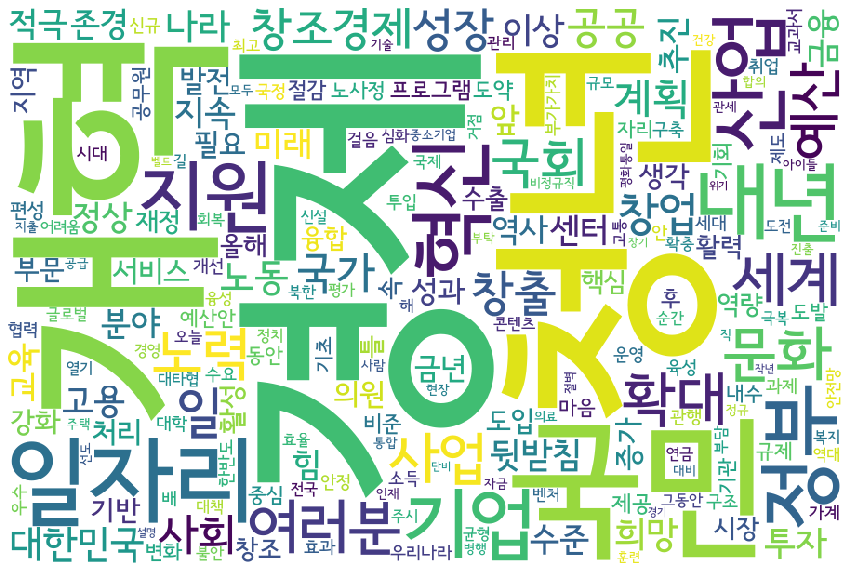

In [54]:
plt.figure(figsize=(15, 20))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## 5. 같은 문장에 등장하는 단어의 관계도 그리기

같은 문장에 등장하는 단어는 서로 연관성이 높을 가능성이 있다.
* 예: '돌이켜 보면, 글로벌 경제위기에다 장기 경기 침체로 연속되는 위기에서 벗어나기 위해 매 순간마다 마음을 놓을 수 없었던 순간들이 많았던 것 같습니다.'
* '글로벌' '경제위기' '경기' '침체' '위기' -> 서로 연관성이 있는 단어들.

### 명사의 unique list 만들기

* enumerate() 사용법

```
choices = ['pizza', 'pasta', 'salad', 'nachos']
list(enumerate(choices))
=> [(0, 'pizza'), (1, 'pasta'), (2, 'salad'), (3, 'nachos')]
```

In [55]:
unique_nouns = set()
for sent in tagged_sentences:    
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            unique_nouns.add(word)

unique_nouns = list(unique_nouns)
noun_index = {noun: i for i, noun in enumerate(unique_nouns)}
noun_index

{'기관': 0,
 '존경': 1,
 '형성': 2,
 '죽음': 3,
 '경험': 4,
 '9월': 5,
 '단지': 6,
 '회복': 7,
 '완화': 8,
 '투입': 9,
 '발길': 10,
 '특수': 11,
 '기존': 12,
 '영감': 13,
 '문': 14,
 '융합': 15,
 '첫걸음': 16,
 '둔화': 17,
 '수요': 18,
 '폐습': 19,
 '전략': 20,
 '선진': 21,
 '국방': 22,
 '체계': 23,
 '아이디어': 24,
 '견제': 25,
 '정쟁': 26,
 '채용': 27,
 '완료': 28,
 '변화': 29,
 '상생': 30,
 '생각': 31,
 '교과서': 32,
 '제자리걸음': 33,
 '최초': 34,
 '조정': 35,
 '게임': 36,
 '전년': 37,
 '덩어리': 38,
 '억제': 39,
 '위축': 40,
 '대형': 41,
 '이유': 42,
 '지원': 43,
 '사명': 44,
 '올해': 45,
 '지속': 46,
 '정치': 47,
 '경쟁력': 48,
 '우려': 49,
 '진통': 50,
 '계층': 51,
 '핀테크': 52,
 '산업화': 53,
 '한반도': 54,
 '반영': 55,
 '감소': 56,
 '나라': 57,
 '자금': 58,
 '주거비': 59,
 '정례': 60,
 '약과': 61,
 '거점': 62,
 '이상': 63,
 '이번': 64,
 '제안': 65,
 '질': 66,
 '대한민국': 67,
 '현장': 68,
 '지표': 69,
 '힘': 70,
 '증가': 71,
 '하루': 72,
 '수출': 73,
 '생태계': 74,
 '기반': 75,
 '결과': 76,
 '상반기': 77,
 '선전': 78,
 '내수': 79,
 '발굴': 80,
 '천명': 81,
 '노조': 82,
 '30년': 83,
 '자신': 84,
 '진흥': 85,
 '불확실성': 86,
 '제고': 87,
 '현실': 88,
 '규제': 89,
 '지

In [58]:
# noun_index['한국전쟁']
noun_index['계획']

343

### 문장-단어 행렬 계산

In [59]:
import numpy as np
occurs = np.zeros([len(tagged_sentences), len(unique_nouns)]) # 디폴트 값 0
np.shape(occurs)

(168, 779)

In [60]:
# one hot coding의 과정이라고 볼 수 있음.

for i, sent in enumerate(tagged_sentences):
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            index = noun_index[word]  # 명사가 있으면, 그 명사의 인덱스를 index에 저정
            occurs[i][index] = 1  # 문장 i의 index 자리에 1을 채워 넣는다. 나머진 생성할 당시의 디폴트 값 0일 것.
            
occurs[0] # 존경, 국민, 여러분 => 첫번째 문장에 나오는 명사들만 1.

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [61]:
noun_index["존경"]
# noun_index["국민"]

1

### 공존 단어 행렬 계산

In [62]:
# 1) occurs.T는 occurs의 가로 세로 뒤집힌 버전 (T는 transpose)
# 2) occurs.T와 occurs를 dot한 것이 co_occurs (dot은 행렬 곱셈 연산)
co_occurs = occurs.T.dot(occurs)

In [63]:
co_occurs[0]

array([4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 2.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### 연관 단어의 network graph 그리기

* pip install networkx

---

- **word cloud**의 한계: 뭐에 대해 말하는지 알 수 없음. (예: 개혁. 무슨 개혁?)
- **word network**: 맥락이 더 잘 드러남

In [67]:
import networkx as nx
graph = nx.Graph()

for i in range(len(unique_nouns)):
    for j in range(i + 1, len(unique_nouns)):
        if co_occurs[i][j] > 4: # 4번 초과 같이 출현한 애들만 연결
            graph.add_edge(unique_nouns[i], unique_nouns[j])

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt

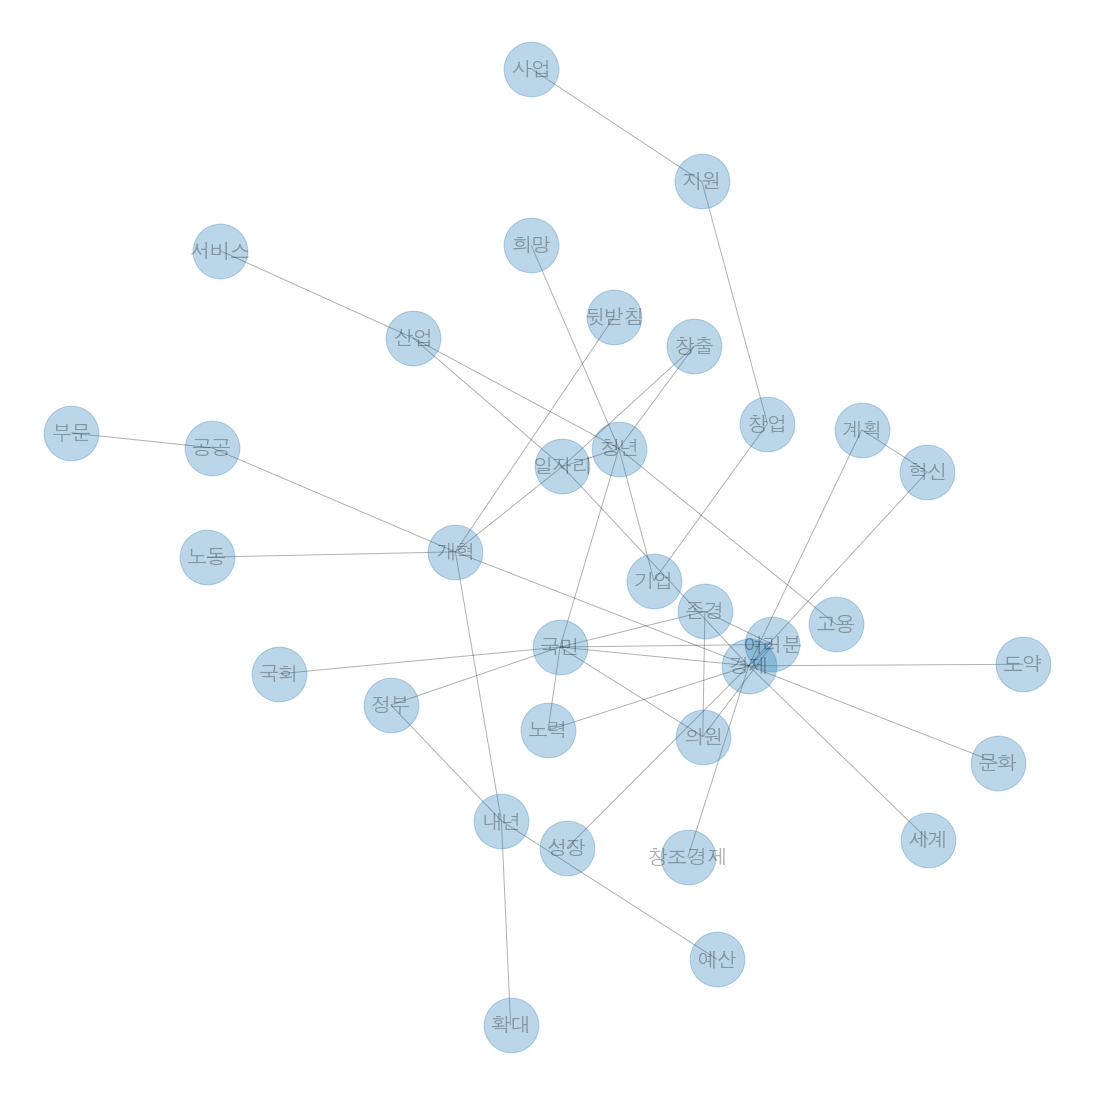

In [69]:
plt.figure(figsize=(15, 15))
layout = nx.spring_layout(graph, k=.5)
nx.draw(graph, pos=layout, with_labels=True,
        font_size=20, font_family="AppleGothic",
        alpha=0.3, node_size=3000)
plt.show()